In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ripser import ripser
from persim import plot_diagrams
import subprocess
import re

# Generate numpy array of random points on torus

## Parametrisation of torus:  
$x = (R + r \cdot \cos(\phi)) \cdot \cos(\psi)$  
$y = (R + r \cdot \cos(\phi)) \cdot \sin(\psi)$  
$z = r \cdot \sin(\theta)$

n = #points on torus  
R = big radius of torus  
r = small radius of torus  

In [2]:
n = 1000
R = 1
r = 0.4

phi = np.random.rand(n)*2*np.pi
psi = np.random.rand(n)*2*np.pi

x = (R + r*np.cos(phi)) * np.cos(psi)
y = (R + r*np.cos(phi)) * np.sin(psi)
z = r * np.sin(phi)

S = np.array([x,y,z])
print('Shape of S: {}'.format(S.shape))

Shape of S: (3, 1000)


# Plot of dataset S

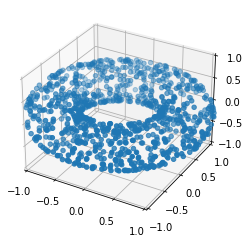

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(S[0,:],S[1,:],S[2,:])
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)
plt.show()

# Calculate distance matrix D and write it to .csv file

In [4]:
D = np.zeros((n,n))

for i in range(n):
    for j in range(i):
        D[i,j] = np.linalg.norm(S[:,i]-S[:,j])

D = D+D.T

np.savetxt("dm_torus.csv", D, delimiter=",")

# Compute persistent homology

In [5]:
ph = ripser(D, distance_matrix=True, maxdim=2)

# Print persistent intervals

In [6]:
pi = ph['dgms']
for deg in range(len(pi)):
    print('Persistent Intervals in dimension {}:'.format(deg))
    print(pi[deg])
    print()

Persistent Intervals in dimension 0:
[[0.         0.00216233]
 [0.         0.00373802]
 [0.         0.0041936 ]
 ...
 [0.         0.18531393]
 [0.         0.21676901]
 [0.                inf]]

Persistent Intervals in dimension 1:
[[0.34464788 0.35111049]
 [0.28059244 0.28335872]
 [0.27630696 0.28981251]
 [0.27518973 0.28422698]
 [0.26674625 0.29638645]
 [0.26523912 0.31372038]
 [0.26258007 0.27989209]
 [0.26257297 0.27275562]
 [0.26193282 0.27566379]
 [0.2503913  0.26676592]
 [0.25035664 0.29762444]
 [0.24967884 0.29654202]
 [0.24861482 0.30376232]
 [0.24677321 0.32280499]
 [0.24588272 0.31534225]
 [0.23556848 0.27134418]
 [0.23494518 0.24032235]
 [0.23350658 0.25940016]
 [0.2334802  0.23822263]
 [0.23171136 0.24509025]
 [0.22910856 0.24078661]
 [0.22907428 0.23469619]
 [0.22785994 0.25310689]
 [0.22770131 0.25866532]
 [0.22709534 0.22894464]
 [0.22683552 0.27642766]
 [0.22436821 0.25241056]
 [0.22329    0.29562527]
 [0.22309683 0.30738044]
 [0.22232212 0.3307921 ]
 [0.22108591 0.2674

# Plot persistent intervals

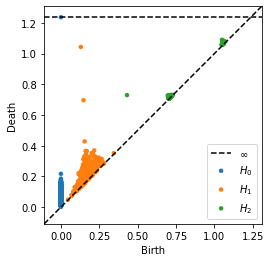

In [7]:
plot_diagrams(pi, show=True)

# Calculate representative cycles with "ripser-representatives" script

## result saved to "ripser_localization.txt" file

In [8]:
with open('ripser_localization.txt', 'w') as file:
    subprocess.run(['./ripser-representatives', 'dm_torus.csv'], stdout=file)

# Read "ripser_localization.txt" file and save row-wise to list "lines"

In [9]:
file = open('ripser_localization.txt')
lines = file.read().splitlines()
file.close()

In [10]:
lines

['value range: [0.00216233,2.79976]',
 'distance matrix with 1000 points, using threshold at enclosing radius 1.99007',
 'persistence intervals in dim 0:',
 'persistence intervals in dim 0:',
 ' [0,0.00216233):  {[72], [858]}',
 ' [0,0.00373802):  {[8], [80]}',
 ' [0,0.0041936):  {[757], [805]}',
 ' [0,0.00653533):  {[309], [755]}',
 ' [0,0.00672942):  {[84], [695]}',
 ' [0,0.00728437):  {[11], [96]}',
 ' [0,0.00732449):  {[121], [577]}',
 ' [0,0.0075363):  {[743], [876]}',
 ' [0,0.0077878):  {[224], [302]}',
 ' [0,0.00788691):  {[227], [418]}',
 ' [0,0.00848537):  {[479], [631]}',
 ' [0,0.00861769):  {[586], [693]}',
 ' [0,0.0102717):  {[167], [331]}',
 ' [0,0.0112454):  {[4], [755]}',
 ' [0,0.0113918):  {[331], [607]}',
 ' [0,0.0117349):  {[633], [857]}',
 ' [0,0.0119409):  {[166], [544]}',
 ' [0,0.0120206):  {[419], [938]}',
 ' [0,0.0120794):  {[192], [617]}',
 ' [0,0.0126472):  {[966], [967]}',
 ' [0,0.0127291):  {[875], [944]}',
 ' [0,0.0135771):  {[460], [827]}',
 ' [0,0.0140591)

# Find lines with "persistence invervals" in string

In [11]:
starting_lines = []

for i in range(len(lines)):
    if 'persistence intervals' in lines[i]:
        starting_lines.append(i)

In [12]:
starting_lines

[2, 3, 1004]

In [13]:
lines[starting_lines[-1]]

'persistence intervals in dim 1:'

# Write representative cycles in dim 1 to dictionary "representative_cycles":

key = (birth of interval, death of interval) - tupel  
value = [edge 1: (point_1, point_2) - tupel, ... , edge_k: (point_1, point_2) - tupel] - list

In [14]:
lines[starting_lines[-1]+1]

' [0.0464904,0.048156):  {[341,821] (0.0464904), [138,341] (0.0431699), [679,821] (0.0322245), [345,679] (0.0304058), [138,345] (0.0191316)}'

In [15]:
representative_cycles = {}

for i in range(starting_lines[-1]+1,len(lines)):
    item = lines[i]
    split = item.split(':  ')
    interval = split[0][2:-1]
    interval = tuple(map(float, interval.split(',')))
    edges = split[1].split(', ')
    for j in range(len(edges)):
        match = re.search(r'\[(.+)\]', edges[j])
        if match:
            edges[j] = match.group(0)[1:-1]
            edges[j] = tuple(map(int,edges[j].split(',')))
    representative_cycles[interval] = edges

In [16]:
representative_cycles

{(0.0464904, 0.048156): [(341, 821),
  (138, 341),
  (679, 821),
  (345, 679),
  (138, 345)],
 (0.0706741, 0.0725844): [(60, 544), (313, 748), (544, 748), (60, 313)],
 (0.0685382, 0.0787415): [(473, 851), (190, 851), (190, 436), (436, 473)],
 (0.0803521, 0.089133): [(246, 473),
  (246, 548),
  (384, 436),
  (436, 473),
  (384, 548)],
 (0.0802533, 0.0983027): [(843, 908), (376, 527), (527, 908), (376, 843)],
 (0.0888854, 0.10204): [(320, 842), (205, 842), (320, 346), (205, 346)],
 (0.0950465, 0.102609): [(335, 582),
  (823, 898),
  (335, 904),
  (582, 823),
  (898, 904)],
 (0.102284, 0.10287): [(148, 287),
  (38, 206),
  (148, 663),
  (38, 287),
  (206, 279),
  (279, 663)],
 (0.0811974, 0.102993): [(428, 549),
  (429, 778),
  (428, 778),
  (50, 429),
  (50, 549)],
 (0.101592, 0.10776): [(102, 839), (150, 672), (102, 672), (150, 839)],
 (0.0988816, 0.108481): [(375, 457), (375, 497), (457, 744), (497, 744)],
 (0.0995171, 0.110252): [(319, 426), (101, 843), (426, 843), (101, 319)],
 (0.10

# Find the two longest persistent intervals

In [17]:
keys = list(representative_cycles.keys())
length = [key[1]-key[0] for key in keys]
index_max = np.argmax(length)
interval_max = keys[index_max]

del keys[index_max]
length = [key[1]-key[0] for key in keys]
index_max_2 = np.argmax(length)
interval_max_2 = keys[index_max_2]

print('The two longest persistent intervals are:')
print(interval_max, interval_max_2)

The two longest persistent intervals are:
(0.12971, 1.04348) (0.147175, 0.696117)


# Seperate points in S into 3 classes:

cp_1 = points on cycle_1  
cp_2 = points on cycle_2  
rem = remaining points in S  

In [18]:
cycle_1 = representative_cycles[interval_max]
cycle_2 = representative_cycles[interval_max_2]

In [19]:
cycle_1

[(272, 608),
 (538, 907),
 (10, 238),
 (408, 748),
 (272, 657),
 (170, 627),
 (211, 657),
 (232, 557),
 (595, 741),
 (623, 681),
 (114, 643),
 (281, 364),
 (557, 627),
 (15, 470),
 (63, 799),
 (114, 211),
 (327, 620),
 (613, 676),
 (370, 495),
 (63, 884),
 (102, 933),
 (198, 354),
 (166, 787),
 (694, 770),
 (213, 865),
 (644, 951),
 (406, 818),
 (706, 884),
 (150, 672),
 (368, 917),
 (170, 519),
 (115, 407),
 (545, 620),
 (284, 561),
 (871, 951),
 (171, 741),
 (561, 865),
 (93, 520),
 (21, 495),
 (120, 462),
 (115, 171),
 (120, 818),
 (681, 907),
 (429, 619),
 (837, 969),
 (361, 594),
 (644, 958),
 (429, 778),
 (240, 968),
 (330, 645),
 (300, 623),
 (364, 407),
 (361, 572),
 (102, 672),
 (526, 765),
 (195, 354),
 (371, 940),
 (130, 670),
 (294, 608),
 (167, 706),
 (130, 229),
 (69, 437),
 (613, 926),
 (645, 969),
 (330, 339),
 (122, 167),
 (186, 300),
 (643, 758),
 (150, 839),
 (437, 949),
 (195, 526),
 (778, 817),
 (676, 839),
 (371, 454),
 (595, 763),
 (213, 519),
 (212, 572),
 (69, 

In [20]:
cp_1 = []
cp_2 = []

for item in cycle_1:
    cp_1.append(item[0])
    cp_1.append(item[1])
    
for item in cycle_2:
    cp_2.append(item[0])
    cp_2.append(item[1])
    
cp_1 = list(set(cp_1))
cp_2 = list(set(cp_2))
rem = list(set(range(n)).difference(set(cp_1)).difference(set(cp_2)))

# Plot of S with representative cycles in dimension 1
red: points on cycle_1  
green: points on cycle_2  
brown: points on cycle_1 & cycle_2  
blue: remaining points in S

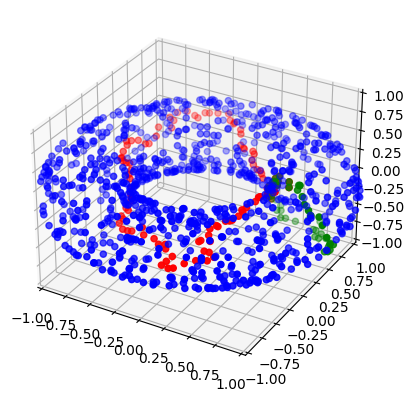

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(S[0,rem],S[1,rem],S[2,rem], color = 'b')
ax.scatter(S[0,cp_1],S[1,cp_1],S[2,cp_1], color = 'r')
ax.scatter(S[0,cp_2],S[1,cp_2],S[2,cp_2], color = 'g')
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)
plt.show()